In [424]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_roc_curve
import warnings
warnings.filterwarnings("ignore")

In [425]:
df= pd.read_excel('modified_dataset.xlsx')
df.head()

,Unnamed: 0,Type,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,...,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,40061,city,0,6,2015,7,27,1,0,2,...,No Deposit,6,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-03
1,40062,city,1,88,2015,7,27,1,0,4,...,No Deposit,9,NULL,0,Transient,76.5,0,1,Canceled,2015-07-01
2,40063,city,1,65,2015,7,27,1,0,4,...,No Deposit,9,NULL,0,Transient,68.0,0,1,Canceled,2015-04-30
3,40064,city,1,92,2015,7,27,1,2,4,...,No Deposit,9,NULL,0,Transient,76.5,0,2,Canceled,2015-06-23
4,40065,city,1,100,2015,7,27,2,0,2,...,No Deposit,9,NULL,0,Transient,76.5,0,1,Canceled,2015-04-02


In [426]:
df = df.drop(['Unnamed: 0','Type'], axis=1)

In [427]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79329 entries, 0 to 79328
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   IsCanceled                   79329 non-null  int64         
 1   LeadTime                     79329 non-null  int64         
 2   ArrivalDateYear              79329 non-null  int64         
 3   ArrivalDateMonth             79329 non-null  int64         
 4   ArrivalDateWeekNumber        79329 non-null  int64         
 5   ArrivalDateDayOfMonth        79329 non-null  int64         
 6   StaysInWeekendNights         79329 non-null  int64         
 7   StaysInWeekNights            79329 non-null  int64         
 8   Adults                       79329 non-null  int64         
 9   Children                     79325 non-null  float64       
 10  Babies                       79329 non-null  int64         
 11  Meal                         79329 non-nu

In [428]:
numerical_type = df.select_dtypes(exclude=['object']).columns.tolist()
#numerical_type
numerical_vars = df[numerical_type].select_dtypes(exclude=['datetime64']).columns.tolist()
numerical_vars

['IsCanceled',
 'LeadTime',
 'ArrivalDateYear',
 'ArrivalDateMonth',
 'ArrivalDateWeekNumber',
 'ArrivalDateDayOfMonth',
 'StaysInWeekendNights',
 'StaysInWeekNights',
 'Adults',
 'Children',
 'Babies',
 'IsRepeatedGuest',
 'PreviousCancellations',
 'PreviousBookingsNotCanceled',
 'BookingChanges',
 'DaysInWaitingList',
 'ADR',
 'RequiredCarParkingSpaces',
 'TotalOfSpecialRequests']

In [429]:
df.describe()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,BookingChanges,DaysInWaitingList,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests
count,79329.000000,79329.000000,79329.000000,79329.000000,79329.000000,79329.000000,79329.000000,79329.000000,79329.000000,79325.000000,79329.000000,79329.000000,79329.000000,79329.000000,79329.000000,79329.000000,79329.000000,79329.000000,79329.000000
mean,0.417262,109.736036,2016.174299,6.556467,27.177438,15.786698,0.795182,2.182960,1.850975,0.091371,0.004941,0.025615,0.079744,0.132373,0.187372,3.226815,105.304828,0.024367,0.546925
std,0.493110,110.949190,0.699173,3.042917,13.398607,8.728481,0.885032,1.456425,0.509295,0.372179,0.084324,0.157984,0.415475,1.693421,0.608624,20.871018,43.603109,0.154920,0.780779
min,0.000000,0.000000,2015.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,23.000000,2016.000000,4.000000,17.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,79.200000,0.000000,0.000000
50%,0.000000,74.000000,2016.000000,7.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,99.900000,0.000000,0.000000
75%,1.000000,163.000000,2017.000000,9.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,629.000000,2017.000000,12.000000,53.000000,31.000000,16.000000,41.000000,4.000000,3.000000,10.000000,1.000000,21.000000,72.000000,21.000000,391.000000,5400.000000,3.000000,5.000000


In [430]:
df.shape

(79329, 31)

In [431]:
# Have an idea of what kind of data in each column
for x in df:
  print(df[x].unique())

[0 1]
[  6  88  65  92 100  79   3  63  62  43   4  97  80  60 106  68  18  71
  85  75  89  83  72 111  86  73  55  69  76  61  77  54  90 117 105  51
  24  84 115  67  87 109  96 114  66  59 122 123  94 120   0 125  82 107
 103  12 118 108 119  20  22  99 112  93 132 110   2  15  98 124  16  19
  81   5  27  25 126  74   1  64 138 102  78 130 135   7  28  34 141  33
 101  13  11  36 128  30 145 142  39 121 147 140 104  41 134 150   8 133
  10  40 131   9 137 127  46  47  14 151  17  44 113  53  50 162 148 149
  21  23  37  49  26  32  52 173  45 164  42  58  48 168  31  38 175 170
  29  35 167 166  56 152 155 116  95  57 179  70 192 169 193 199 204 200
  91 198 158 210 156 174 184 180 195 216 233 212 139 242 208 146 144 159
 197 129 160 154 393 251 157 161 136 182 267 274 268 190 281 188 275 270
 265 288 143 295 443 194 437 253 207 302 259 178 289 298 286 309 196 273
 276 297 191 451 217 323 316 189 322 211 163 172 153 205 202 330 177 220
 247 213 337 282 239 256 344 245 350 290 351 

In [432]:
for col in df.columns:
    # Check if the column is of object type
    if df[col].dtypes == 'object':
        #remove space in the object type column
        df[col] = df[col].str.strip()

In [433]:
missed_values= df.isnull().sum().sort_values(ascending = False)
missed_values

Agent                          71198
Company                         3689
Country                           24
Children                           4
IsCanceled                         0
PreviousBookingsNotCanceled        0
ReservationStatus                  0
TotalOfSpecialRequests             0
RequiredCarParkingSpaces           0
ADR                                0
CustomerType                       0
DaysInWaitingList                  0
DepositType                        0
BookingChanges                     0
AssignedRoomType                   0
ReservedRoomType                   0
IsRepeatedGuest                    0
PreviousCancellations              0
LeadTime                           0
DistributionChannel                0
MarketSegment                      0
Meal                               0
Babies                             0
Adults                             0
StaysInWeekNights                  0
StaysInWeekendNights               0
ArrivalDateDayOfMonth              0
A

In [434]:
df['Children'].unique()

array([ 0.,  1.,  2., nan,  3.])

In [435]:
# Removing NA from children 

df.dropna(axis= 0, inplace= True, subset= ['Children'])

In [436]:
df['Children'].unique()

array([0., 1., 2., 3.])

In [437]:
# Removing NA from country 

df.dropna(axis= 0, inplace= True, subset= ['Country'])

In [438]:
# Replacing NA with No agent

df['Agent'].replace(np.nan, 'No Agent', inplace= True)

In [439]:
print(missed_values.idxmax())
missed_values.max()

Agent


71198

In [440]:
# Replacing the missing values with mode

df['Children'].fillna(df['Children'].mode()[0], inplace=True)
df['Country'].fillna(df['Country'].mode()[0], inplace=True)

In [441]:
df.isnull().sum().sort_values(ascending= False)

Company                        3689
IsCanceled                        0
PreviousCancellations             0
ReservationStatus                 0
TotalOfSpecialRequests            0
RequiredCarParkingSpaces          0
ADR                               0
CustomerType                      0
DaysInWaitingList                 0
Agent                             0
DepositType                       0
BookingChanges                    0
AssignedRoomType                  0
ReservedRoomType                  0
PreviousBookingsNotCanceled       0
IsRepeatedGuest                   0
LeadTime                          0
DistributionChannel               0
MarketSegment                     0
Country                           0
Meal                              0
Babies                            0
Children                          0
Adults                            0
StaysInWeekNights                 0
StaysInWeekendNights              0
ArrivalDateDayOfMonth             0
ArrivalDateWeekNumber       

In [442]:
df.to_csv('new_clean_data2.csv', encoding='utf-8', index=False)

In [443]:
df['Country'].value_counts()[:10]

PRT    30960
FRA     8804
DEU     6084
GBR     5315
ESP     4611
ITA     3307
BEL     1894
BRA     1794
USA     1614
NLD     1590
Name: Country, dtype: int64

In [444]:
Country_count = df['Country'].value_counts()
Country = list(Country_count.keys())
count = list(Country_count.values)

In [445]:
round(df['ADR'].mean(),2)

105.3

In [446]:
df['stay']= df['StaysInWeekendNights']+ df['StaysInWeekNights']
round(df['stay'].mean(),2)

2.98

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


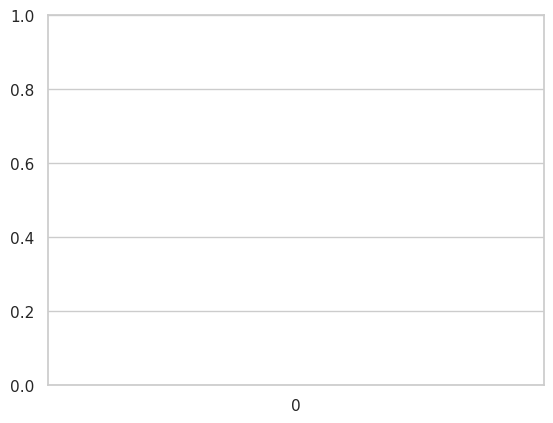

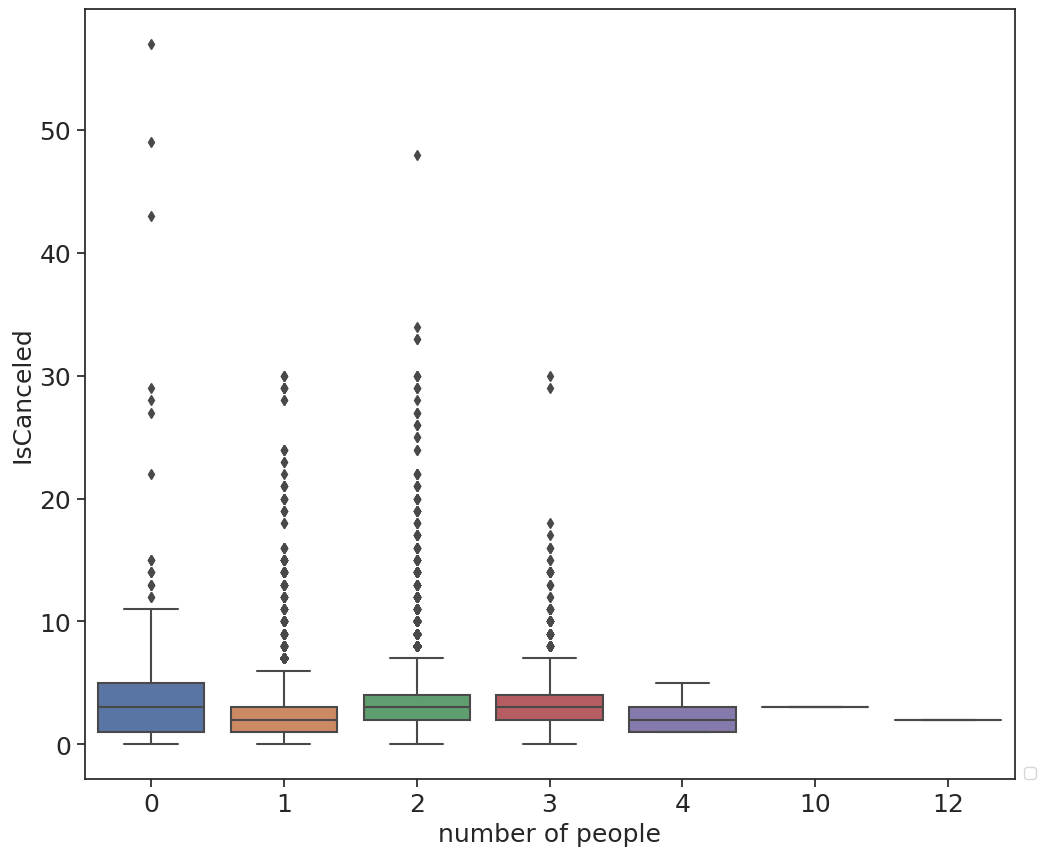

In [447]:
is_canceled_df = df
is_canceled_df['number of people']=is_canceled_df['Babies']+is_canceled_df['Adults']
is_canceled_df['stays']= is_canceled_df['StaysInWeekendNights']+is_canceled_df['StaysInWeekNights']
sns.boxplot()
sns.set_style('ticks')
plt.figure(figsize=(12,10))
sns.boxplot(data = is_canceled_df, x = 'number of people', y = 'stays', width = 0.8)
plt.xlabel("number of people", fontsize = 18)
plt.xticks(fontsize=18)
plt.ylabel("IsCanceled", fontsize = 18)
plt.yticks(fontsize=18)
plt.legend(loc=(1.01, 0))


In [448]:

from pandas.api.types import CategoricalDtype
from pandas import factorize

#stacked = is_canceled_df[['ArrivalDateMonth']].stack()
#is_canceled_df[['ArrivalDateMonth']] = pd.Series(stacked.factorize()[0], index=stacked.index).unstack()
#print (is_canceled_df['ArrivalDateMonth'].unique())
#stacked = is_canceled_df[['Meal']].stack()
#is_canceled_df[['Meal']] = pd.Series(stacked.factorize()[0], index=stacked.index).unstack()
#print (is_canceled_df['Meal'].unique())
#stacked = is_canceled_df[['DistributionChannel']].stack()
#is_canceled_df[['DistributionChannel']] = pd.Series(stacked.factorize()[0], index=stacked.index).unstack()
#print (is_canceled_df['DistributionChannel'].unique())
#stacked = is_canceled_df[['DepositType']].stack()
#is_canceled_df[['DepositType']] = pd.Series(stacked.factorize()[0], index=stacked.index).unstack()
#print (is_canceled_df['DepositType'].unique())
#stacked = is_canceled_df[['CustomerType']].stack()
#is_canceled_df[['CustomerType']] = pd.Series(stacked.factorize()[0], index=stacked.index).unstack()
#print (is_canceled_df['CustomerType'].unique())
#stacked = is_canceled_df[['ReservationStatus']].stack()
#is_canceled_df[['ReservationStatus']] = pd.Series(stacked.factorize()[0], index=stacked.index).unstack()
#print (is_canceled_df['ReservationStatus'].unique())
#stacked = is_canceled_df[['ReservedRoomType']].stack()
#is_canceled_df[['ReservedRoomType']] = pd.Series(stacked.factorize()[0], index=stacked.index).unstack()
#print (is_canceled_df['ReservedRoomType'].unique())
#stacked = is_canceled_df[['AssignedRoomType']].stack()
#is_canceled_df[['AssignedRoomType']] = pd.Series(stacked.factorize()[0], index=stacked.index).unstack()
#print (is_canceled_df['AssignedRoomType'].unique())

#stacked = is_canceled_df[['MarketSegment']].stack()
#is_canceled_df[['MarketSegment']] = pd.Series(stacked.factorize()[0], index=stacked.index).unstack()
#print (is_canceled_df['MarketSegment'].unique())
#stacked = is_canceled_df[['Agent']].stack()
#is_canceled_df[['Agent']] = pd.Series(stacked.factorize()[0], index=stacked.index).unstack()
#print (is_canceled_df['Agent'].unique())
#stacked = is_canceled_df[['Company']].stack()
#is_canceled_df[['Company']] = pd.Series(stacked.factorize()[0], index=stacked.index).unstack()
#print (is_canceled_df['Company'].unique())
#stacked = is_canceled_df[['Country']].stack()
#is_canceled_df[['Country']] = pd.Series(stacked.factorize()[0], index=stacked.index).unstack()
#print (is_canceled_df['Country'].unique())
#is_canceled_df.info()


In [449]:
#is_canceled_df['ADR'] = is_canceled_df['ADR'].astype(int)
#is_canceled_df['Company'] = is_canceled_df['Company'].astype(int)
#Wis_canceled_df['Children'] = is_canceled_df['Children'].astype(int)
is_canceled_df['Children'] = is_canceled_df['Children'].fillna(0)
is_canceled_df['ADR'] = is_canceled_df['ADR'].astype(int)


In [450]:
is_canceled_df.columns[is_canceled_df.isin(['Null']).any()]

Index([], dtype='object')

In [451]:
from sklearn.model_selection import train_test_split
y=is_canceled_df["IsCanceled"]
X=is_canceled_df[['LeadTime',
 'ArrivalDateYear',
 'ArrivalDateMonth',
 'ArrivalDateWeekNumber',
 'ArrivalDateDayOfMonth',
 'StaysInWeekendNights',
 'StaysInWeekNights',
 'Adults',
 'Children',
 'Babies',
 'IsRepeatedGuest',
 'PreviousCancellations',
 'PreviousBookingsNotCanceled',
 'BookingChanges',
 'DaysInWaitingList',
 'ADR',
 'RequiredCarParkingSpaces',
 'TotalOfSpecialRequests']]
#X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

In [452]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)

X_scaled = scaler.transform(X)

In [453]:
#from mpl_toolkits.mplot3d import Axes3D
#fig = plt.figure()
#ax = fig.add_subplot(111, projection='3d')
#ax.scatter(X[:, 2], X[:, 0])
#plt.show()

In [454]:
#is_canceled_df[is_canceled_df['Country'].shape[0]>1]
#Country_count = is_canceled_df[is_canceled_df['Country'].count()]
#Country = list(Country_count.keys())
#Country_count
#count = list(Country_count.values)
#for i in Country:
 #   if (Country_count[i].values==1):
  #      is_canceled_df.index
#is_canceled_df = is_canceled_df.drop(is_canceled_df[(is_canceled_df['Country'].value_counts())==1].index)
#is_multi = is_canceled_df["Country"].value_counts() > 1
#is_multi
#filtered = is_canceled_df[is_canceled_df["Country"].isin(is_multi[is_multi].index)]
country_df=is_canceled_df.groupby('Country').filter(lambda x : len(x)>1)
country_df.shape[0]
country_df.to_csv("country_hotel_data.csv")
#led_df[is_canceled_df.drop(country_df.index,axis="rows")

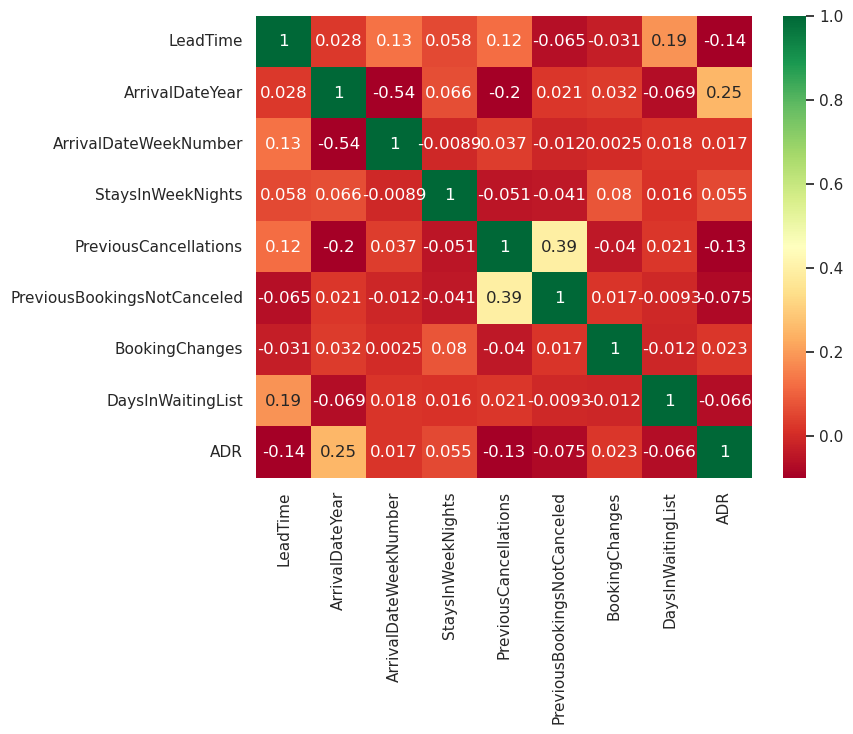

In [464]:
plt.figure(figsize=(8,6))
sns.set(style="whitegrid")
sns.heatmap(is_canceled_df[X_var].corr(method='pearson'), vmin=-.1, vmax=1,  annot=True, cmap='RdYlGn')
plt.show()

In [628]:
from sklearn.model_selection import train_test_split
y_var=["IsCanceled"]
X_var=['LeadTime','ArrivalDateYear', 'ArrivalDateWeekNumber','StaysInWeekNights', 
                   'PreviousCancellations','PreviousBookingsNotCanceled', 'BookingChanges', 'DaysInWaitingList',
                    'ADR'
                  ]
new_df=is_canceled_df.iloc[0:2000]
updated_df = new_df[['IsCanceled','LeadTime','ArrivalDateYear', 'ArrivalDateWeekNumber','StaysInWeekNights', 
                   'PreviousCancellations','PreviousBookingsNotCanceled', 'BookingChanges', 'DaysInWaitingList',
                    'ADR']]

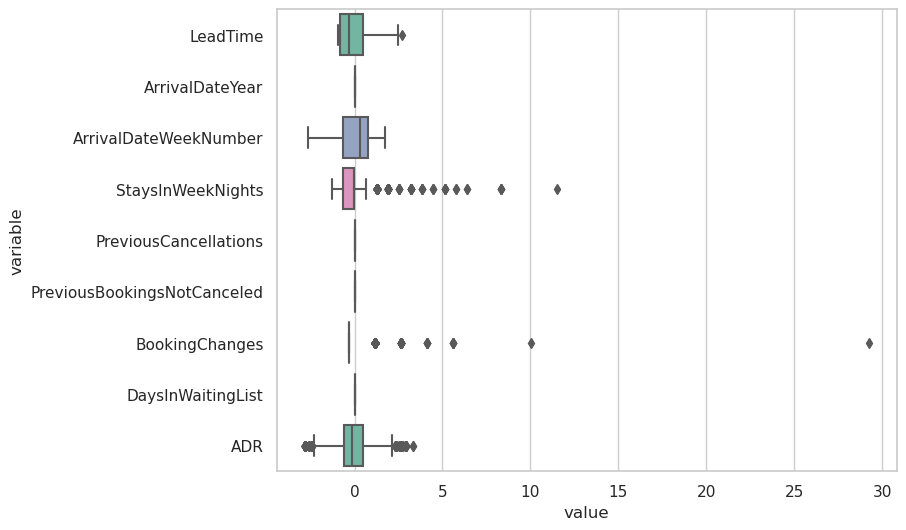

In [629]:
from sklearn.preprocessing import scale
numerical_features=X_var
df_scaled = scale(updated_df[numerical_features])
df2 = pd.DataFrame(df_scaled, columns=X_var)
df2['IsCanceled'] = pd.Series(updated_df['IsCanceled'], index=updated_df.index)
df3 = pd.melt(df2, id_vars='IsCanceled', value_vars=df2[numerical_features])
plt.figure(figsize=(8,6))
sns.set(style="whitegrid")
sns.boxplot(y='variable',x='value', data=df3, palette="Set2")
plt.show()

In [630]:


    
    #'LeadTime',  'ArrivalDateWeekNumber','StaysInWeekNights', 
     #               'ADR','TotalOfSpecialRequests']
        
y=updated_df[y_var]
X=updated_df[X_var]
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

In [631]:
import prince
pca = prince.PCA(
     n_components=6,
     n_iter=10,
     rescale_with_mean=False,
     rescale_with_std=False,
     copy=True,
     check_input=True,
     engine='sklearn',
     random_state=234
 )
pca = pca.fit(updated_df[X_var]) 

In [632]:
print(pca.eigenvalues_)

[4.06942495e+06 1.96668241e+03 7.97449759e+02 3.93539394e+00
 2.42706679e+00 4.32448641e-01]


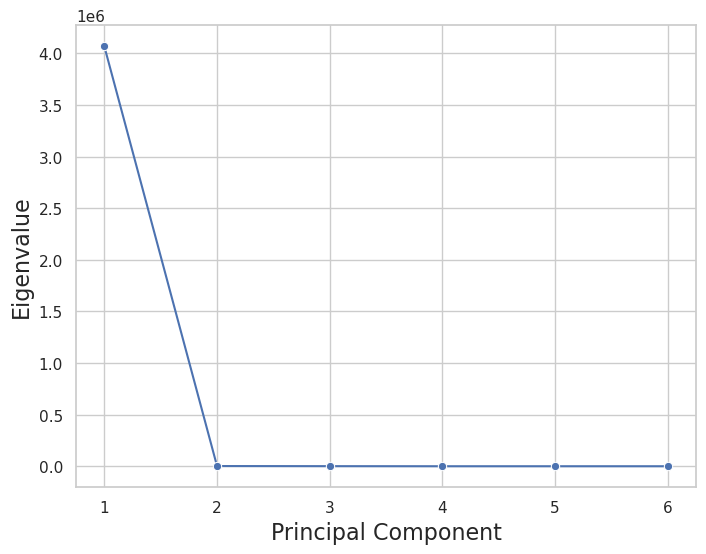

In [633]:
dset = pd.DataFrame()
dset['pca'] = range(1,7)
dset['eigenvalue'] = pd.DataFrame(pca.eigenvalues_)
plt.figure(figsize=(8,6))
sns.lineplot(x='pca', y='eigenvalue', marker="o", data=dset)
plt.ylabel('Eigenvalue', fontsize=16)
plt.xlabel('Principal Component', fontsize=16)
plt.show()

In [634]:
print(pca.explained_inertia_)

[9.99319550e-01 4.82953784e-04 1.95827947e-04 9.66405855e-07
 5.96009343e-07 1.06195442e-07]


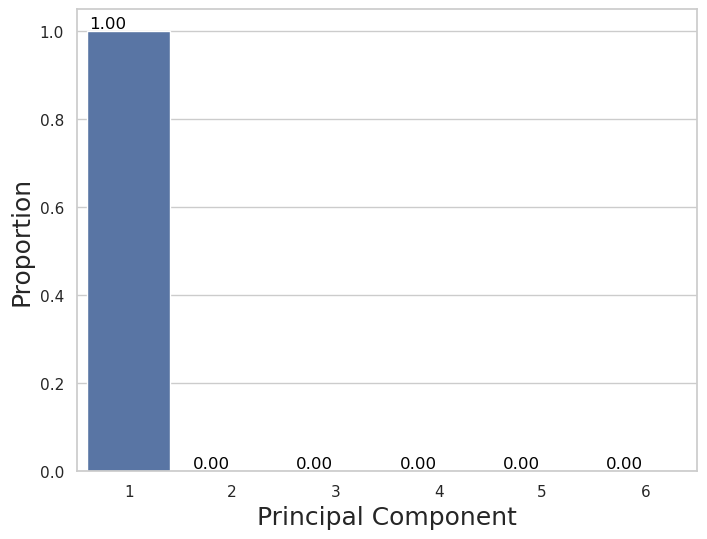

In [635]:
dset = pd.DataFrame()
dset['pca'] = range(1,7)
dset['vari'] = pd.DataFrame(pca.explained_inertia_)

plt.figure(figsize=(8,6))
graph = sns.barplot(x='pca', y='vari', data=dset)
for p in graph.patches:
    graph.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()),
                   ha='center', va='bottom',
                   color= 'black')
plt.ylabel('Proportion', fontsize=18)
plt.xlabel('Principal Component', fontsize=18)
plt.show()

In [636]:
pca.column_correlations(new_df[X_var])


,0,1,2,3,4,5
ADR,0.770227,-0.009843,0.999951,0.000895,0.000231,0.000036
ArrivalDateWeekNumber,0.030016,-0.207666,0.180413,-0.961025,0.027165,-0.004383
ArrivalDateYear,NaN,NaN,NaN,NaN,NaN,NaN
BookingChanges,-0.106874,-0.075683,-0.077572,-0.029322,0.235402,0.965392
DaysInWaitingList,NaN,NaN,NaN,NaN,NaN,NaN
LeadTime,0.633338,0.999989,0.004592,-0.000439,0.000096,0.000012
PreviousBookingsNotCanceled,NaN,NaN,NaN,NaN,NaN,NaN
PreviousCancellations,NaN,NaN,NaN,NaN,NaN,NaN
StaysInWeekNights,-0.101182,-0.062696,-0.080632,0.047216,0.992719,-0.042978


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


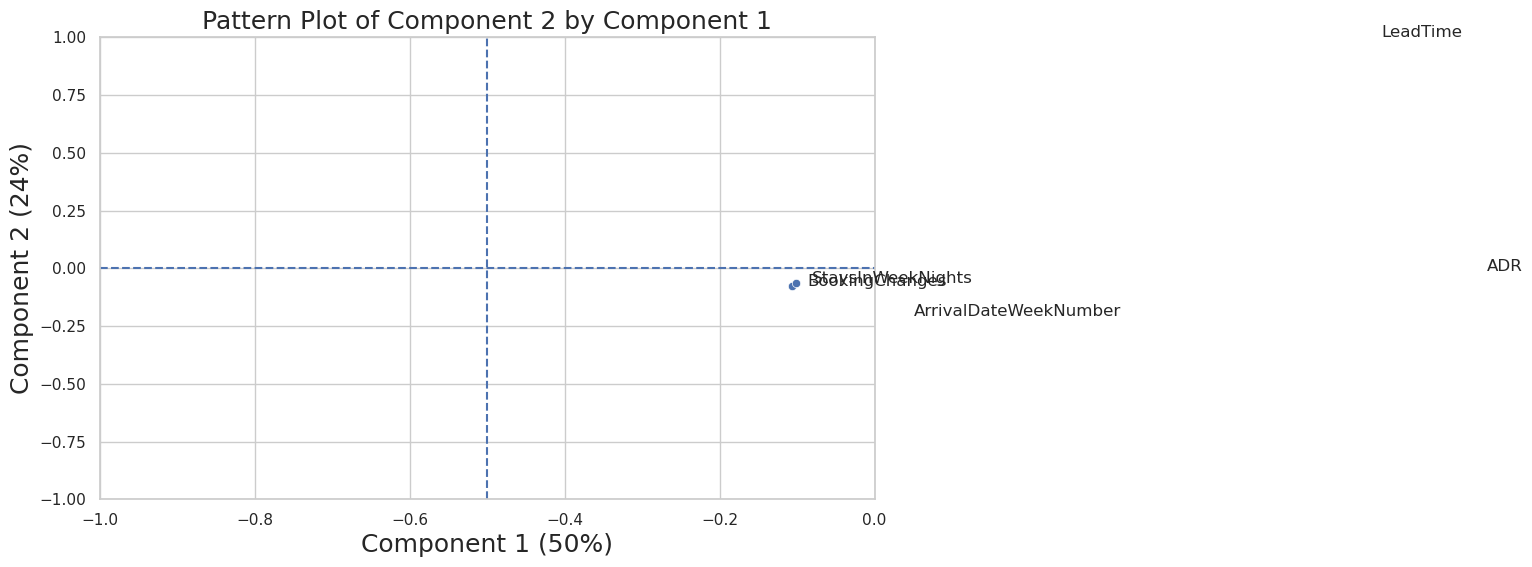

In [637]:
scatter = pd.DataFrame(pca.column_correlations(updated_df[X_var])).reset_index()
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x=0, y=1, data=scatter)
ax.set(ylim=(-1, 1), xlim=(-1,0))
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))
label_point(scatter[0], scatter[1], scatter['index'], plt.gca())  
plt.axvline(-0.5, ls='--')
plt.axhline(0, ls='--')
plt.title('Pattern Plot of Component 2 by Component 1', fontsize=18)
plt.xlabel('Component 1 (50%)', fontsize=18)
plt.ylabel('Component 2 (24%)', fontsize=18)
plt.show()

In [638]:
np.isinf(new_df[X_var]).any()

LeadTime                       False
ArrivalDateYear                False
ArrivalDateWeekNumber          False
StaysInWeekNights              False
PreviousCancellations          False
PreviousBookingsNotCanceled    False
BookingChanges                 False
DaysInWaitingList              False
ADR                            False
dtype: bool

In [639]:
np.isnan(new_df[X_var]).any()

LeadTime                       False
ArrivalDateYear                False
ArrivalDateWeekNumber          False
StaysInWeekNights              False
PreviousCancellations          False
PreviousBookingsNotCanceled    False
BookingChanges                 False
DaysInWaitingList              False
ADR                            False
dtype: bool

In [640]:
kmeans5 = KMeans(n_clusters=5,  random_state=0) 
result =kmeans5.fit_predict(df2[X_var])
result
kmeans5.labels_
#new_df.index
df2['Kcluster'] =  pd.Series(kmeans5.labels_, index=df2.index)
df2['Kcluster']
#new_cluster = df2['Kcluster'].drop

0       1
1       2
2       2
3       2
4       2
       ..
1995    0
1996    0
1997    0
1998    0
1999    0
Name: Kcluster, Length: 2000, dtype: int32

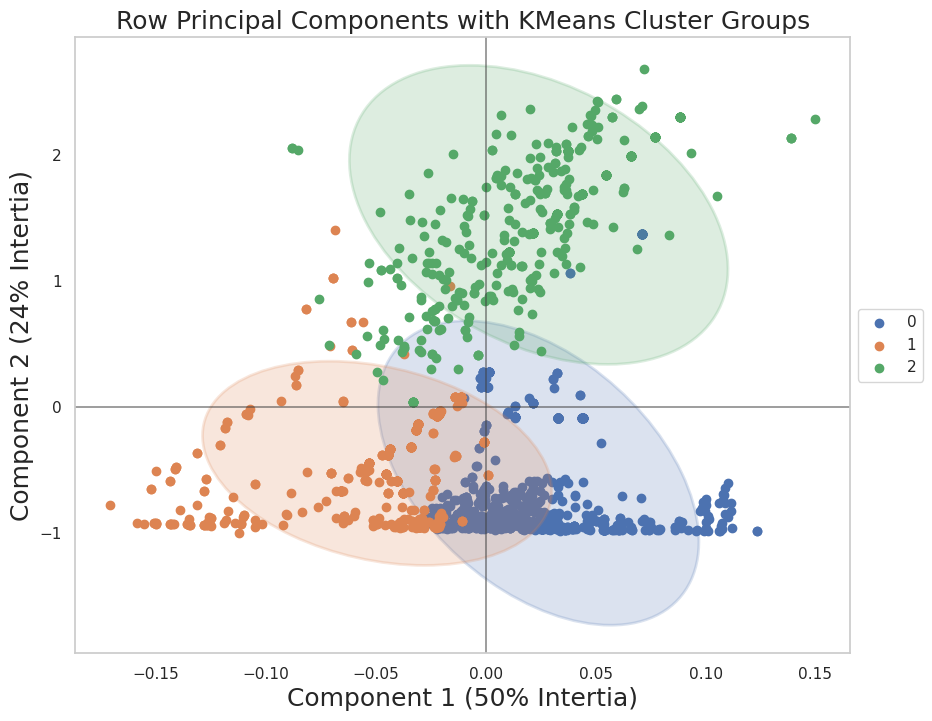

In [641]:
ax = pca.plot_row_coordinates(
     df2[X_var],
     ax=None,
     figsize=(10, 8),
     x_component=0,
     y_component=1,
     labels=None,
     color_labels=df2['Kcluster'],
     ellipse_outline=True,
     ellipse_fill=True,
     show_points=True
 ).legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Row Principal Components with KMeans Cluster Groups', fontsize=18)
plt.xlabel('Component 1 (50% Intertia)',fontsize=18)
plt.ylabel('Component 2 (24% Intertia)', fontsize=18)
plt.show()

In [642]:
pivot = pd.pivot_table(data=df2, index=['Kcluster'])
pivot

,ADR,ArrivalDateWeekNumber,ArrivalDateYear,BookingChanges,DaysInWaitingList,IsCanceled,LeadTime,PreviousBookingsNotCanceled,PreviousCancellations,StaysInWeekNights
Kcluster,,,,,,,,,,
0,0.590516,0.699811,0.0,0.039582,0.0,0.315116,-0.511400,0.0,0.0,0.101418
1,-0.852505,-0.374981,0.0,0.039280,0.0,0.286154,-0.456101,0.0,0.0,-0.174189
2,0.099284,-0.735956,0.0,-0.122901,0.0,0.493827,1.518826,0.0,0.0,0.054372


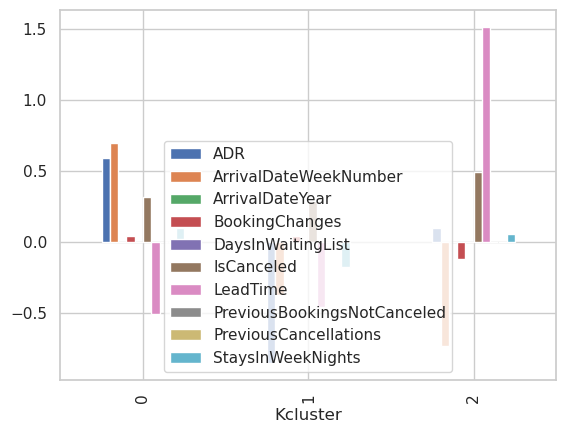

In [643]:
pivot.plot(kind='bar');